# Some definitions

This is the second version which gets rid of the sessions and their respective ids.

In [86]:
import requests
import urllib
import json


SERVER = 'http://localhost:3000'



A function to handle requests

In [87]:
def make_request(url, method, params=None, data=None):    
    if method == 'POST' or method == 'post':
        print(json.dumps(data, indent=4))
        response = requests.post(url=url, data=data)
    elif method == 'GET' or method =='get':
        print(json.dumps(params, indent=4))
        response = requests.get(url=url, params=params)
    else:
        return "Method {} not supported".format(method)
        
    if response.status_code == 200:
        print("{} {}".format(method, response.url))
        json_response = response.json()
        print(json.dumps(json_response, indent=4))
        return json_response
    else:
        print("{} {} {}".format(method, url, response.status_code))
        print(json.dumps(response.json(), indent=4))
    

# Reduction

The API has to be really "loose" so in this notebook I'll just exemplify the steps.


## Get Overscan and apply

In [89]:
url = urllib.parse.urljoin(SERVER, '/api/image/overscan/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": "", 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': '0104_bias_spec1x1.fits'}

json_response = make_request(url=url, method='GET', params=params)


print(json_response["overscan_region"])
overscan_region = json_response['overscan_region']
params['overscan_region'] = overscan_region


{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "0104_bias_spec1x1.fits",
    "overscan_region": "",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "observer_name": "Simon Torres",
    "trim_section": "",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/image/overscan/?slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&file=0104_bias_spec1x1.fits&overscan_region=&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&observer_name=Simon+Torres&trim_section=&trim_type=trimsec
{
    "overscan_region": "[6:49,1:1896]"
}
[6:49,1:1896]


In [90]:
params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': '0073_CVSO_200.fits'}
    
json_response = make_request(url=url, method='POST', data=params)
file_reduced = json_response['overscan_corrected']

{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "observer_name": "Simon Torres",
    "trim_section": "",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/image/overscan/
{
    "overscan_corrected": "o_0073_CVSO_200.fits",
    "original_file": "0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]"
}


## Get trim section

In [92]:
url = urllib.parse.urljoin(SERVER, '/api/image/trim/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': file_reduced,
          'path_type': 'reduced'}
    
json_response = make_request(url=url, method='GET', params=params)

print(json.dumps(params, indent=4))

params['trim_section'] = json_response['trim_section']


{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "o_0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "observer_name": "Simon Torres",
    "trim_section": "",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/image/trim/?slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&file=o_0073_CVSO_200.fits&overscan_region=%5B6%3A49%2C1%3A1896%5D&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&path_type=reduced&observer_name=Simon+Torres&trim_section=&trim_type=trimsec
{
    "trim_section": "[51:4110,2:1896]"
}
{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "o_0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "observer_name": "Simon

In [94]:

json_response = make_request(url=url, method='POST', data=params)
params['file'] = json_response['trimmed_image']

{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "o_0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "observer_name": "Simon Torres",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/image/trim/
{
    "trim_section": "[51:4110,2:1896]",
    "trimmed_image": "to_0073_CVSO_200.fits",
    "parent_file": "o_0073_CVSO_200.fits",
    "trim_type": "trimsec"
}


## Create Master Bias



In [243]:
url = urllib.parse.urljoin(SERVER, '/api/calibrations/bias/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20191017",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20191017",
          "overscan_region": "",
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': '',
          'path_type': 'reduced',
          'auto_discover': 'true'}

json_response = make_request(url=url, method='POST', data=params)



{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20191017",
    "file": "",
    "overscan_region": "",
    "raw_data_path": "/pipeline/data/raw/NOAO/20191017",
    "path_type": "reduced",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "trim_section": "",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/calibrations/bias/
{
    "master_bias": [
        {
            "master_bias_RED_2x2_R03.89_G01.48": {
                "elapsed_time": 25.500218152999878,
                "full_path": "",
                "file_list": [
                    "0172_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                    "0173_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                    "0174_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                    "0175_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                    "0176_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                    "0177_BIAS_344ATTN3_SP_2x2-23-09-2019.fits",
                 

### Retrieve the master bias for an image

In [96]:
url = urllib.parse.urljoin(SERVER, '/api/calibrations/bias/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': '',
          'path_type': 'reduced',
          'auto_discover': 'true'}

json_response = make_request(url=url, method='GET', params=params)



{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/calibrations/bias/?slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&file=&overscan_region=%5B6%3A49%2C1%3A1896%5D&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&path_type=reduced&auto_discover=true&observer_name=Simon+Torres&trim_section=%5B51%3A4110%2C2%3A1896%5D&trim_type=trimsec
{
    "master_bias": [
        [
            "master_bias.fits"
        ]
    ]
}


In [97]:
url = urllib.parse.urljoin(SERVER, '/api/calibrations/bias/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': 'to_0073_CVSO_200.fits',
          'path_type': 'reduced',
          'auto_discover': 'true'}
 
json_response = make_request(url=url, method='GET', params=params)



{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "to_0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/calibrations/bias/?slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&file=to_0073_CVSO_200.fits&overscan_region=%5B6%3A49%2C1%3A1896%5D&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&path_type=reduced&auto_discover=true&observer_name=Simon+Torres&trim_section=%5B51%3A4110%2C2%3A1896%5D&trim_type=trimsec
{
    "master_bias": "master_bias.fits"
}


In [98]:
master_bias_file = json_response['master_bias']
print(master_bias_file)

master_bias.fits


In [100]:

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          'file': "to_0073_CVSO_200.fits",
          'path_type': 'reduced',
          'auto_discover': 'true'}

json_response = make_request(url=url, method='GET', params=params)


{
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "file": "to_0073_CVSO_200.fits",
    "overscan_region": "[6:49,1:1896]",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/calibrations/bias/?slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&file=to_0073_CVSO_200.fits&overscan_region=%5B6%3A49%2C1%3A1896%5D&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&path_type=reduced&auto_discover=true&observer_name=Simon+Torres&trim_section=%5B51%3A4110%2C2%3A1896%5D&trim_type=trimsec
{
    "master_bias": "master_bias.fits"
}


## Create Master Flats

In [244]:
 url = urllib.parse.urljoin(SERVER, '/api/calibrations/flats/')
    
params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20191017",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20191017",
          "overscan_region": "", 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          "file": "",
          "path_type": "reduced",
          "auto_discover": "true",
          "saturation_threshold": 1,
          "ignore_bias": "false",
          "master_bias":"master_bias_RED_2x2_R03.89_G01.48.fits"}

json_response = make_request(url=url, method='POST', data=params)



{
    "saturation_threshold": 1,
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20191017",
    "overscan_region": "",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "ignore_bias": "false",
    "master_bias": "master_bias_RED_2x2_R03.89_G01.48.fits",
    "file": "",
    "raw_data_path": "/pipeline/data/raw/NOAO/20191017",
    "path_type": "reduced",
    "trim_section": "",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/calibrations/flats/
{
    "trim_section": "[26:2055,2:948]",
    "master_flat": [
        {
            "master_flat_400_M2_GG455": {
                "full_path": "/pipeline/data/reduced/NOAO/20191017",
                "file_list": [
                    "0127_DFLAT-23-09-2019.fits",
                    "0128_DFLAT-23-09-2019.fits",
                    "0129_DFLAT-23-09-2019.fits",
                    "0130_DFLAT-23-09-2019.fits",
                    "0131_DFLAT-23-09-2019.fits",
                    "0

### Retrieve it

In [102]:

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          "file": "",
          "path_type": "reduced",
          "auto_discover': "true",
          "saturation_threshold": 1,
          "ignore_bias": "false",
          "master_bias": master_bias_file}

json_response = make_request(url=url, method='GET', params=params)


{
    "saturation_threshold": 1,
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "overscan_region": "[6:49,1:1896]",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "ignore_bias": "false",
    "master_bias": "master_bias.fits",
    "file": "",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
GET http://localhost:3000/api/calibrations/flats/?saturation_threshold=1&slit_trim_section=&reduced_data_path=%2Fpipeline%2Fdata%2Freduced%2FNOAO%2F20190912&overscan_region=%5B6%3A49%2C1%3A1896%5D&auto_discover=true&observer_name=Simon+Torres&ignore_bias=false&master_bias=master_bias.fits&file=&raw_data_path=%2Fpipeline%2Fdata%2Fraw%2FNOAO%2F20190912&path_type=reduced&trim_section=%5B51%3A4110%2C2%3A1896%5D&trim_type=trimsec
{
    "master_flat": [
        [
            "master_flat_400_m2_GG455.fits"
        ],
        [
   

## Apply Bias Correction

In [122]:
params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          "file": "to_0073_CVSO_200.fits",
          "path_type": "reduced",
          "auto_discover': "true",
          "saturation_threshold": 1,
          "ignore_bias": "false",
          "master_bias": ""}

url = urllib.parse.urljoin(SERVER, '/api/image/bias/')
    
json_response = make_request(url=url, method='POST', data=params)

params['file'] = json_response['bias_corrected']

{
    "saturation_threshold": 1,
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "overscan_region": "[6:49,1:1896]",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "ignore_bias": "false",
    "master_bias": "",
    "file": "to_0073_CVSO_200.fits",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/image/bias/
{
    "master_bias": "master_bias.fits",
    "bias_corrected": "zto_0073_CVSO_200.fits"
}


## Apply flat correction

In [126]:
url = urllib.parse.urljoin(SERVER, '/api/image/flat/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          "file": json_response['bias_corrected'],
          "path_type": "reduced",
          "auto_discover': "true",
          "saturation_threshold": 1,
          "ignore_bias": "false",
          "master_bias": ""}

json_response = make_request(url=url, method='POST', data=params)
params['file'] = json_response['flat_corrected']

{
    "saturation_threshold": 1,
    "slit_trim_section": "",
    "reduced_data_path": "/pipeline/data/reduced/NOAO/20190912",
    "overscan_region": "[6:49,1:1896]",
    "auto_discover": "true",
    "observer_name": "Simon Torres",
    "ignore_bias": "false",
    "master_bias": "",
    "file": "zto_0073_CVSO_200.fits",
    "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
    "path_type": "reduced",
    "trim_section": "[51:4110,2:1896]",
    "trim_type": "trimsec"
}
POST http://localhost:3000/api/image/flat/
{
    "flat_corrected": "fzto_0073_CVSO_200.fits",
    "master_flat": "master_flat_400_m2_GG455.fits"
}


## Cosmic Ray Rejection

In [2]:
url = urllib.parse.urljoin(SERVER, '/api/image/creject/')

params = {"observer_name": "Simon Torres",
          "raw_data_path": "/pipeline/data/raw/NOAO/20190912",
          "reduced_data_path":"/pipeline/data/reduced/NOAO/20190912",
          "overscan_region": overscan_region, 
          "trim_section": "", 
          "slit_trim_section": "",
          "trim_type": "trimsec",
          "file": json_response['flat_corrected'],
          "path_type": "reduced",
          "auto_discover": "true",
          "saturation_threshold": 1,
          "ignore_bias": "false",
          "master_bias": ""}

json_response = make_request(url=url, method='POST', data=params)
# params['file'] = json_response['flat_corrected']

NameError: name 'urllib' is not defined

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


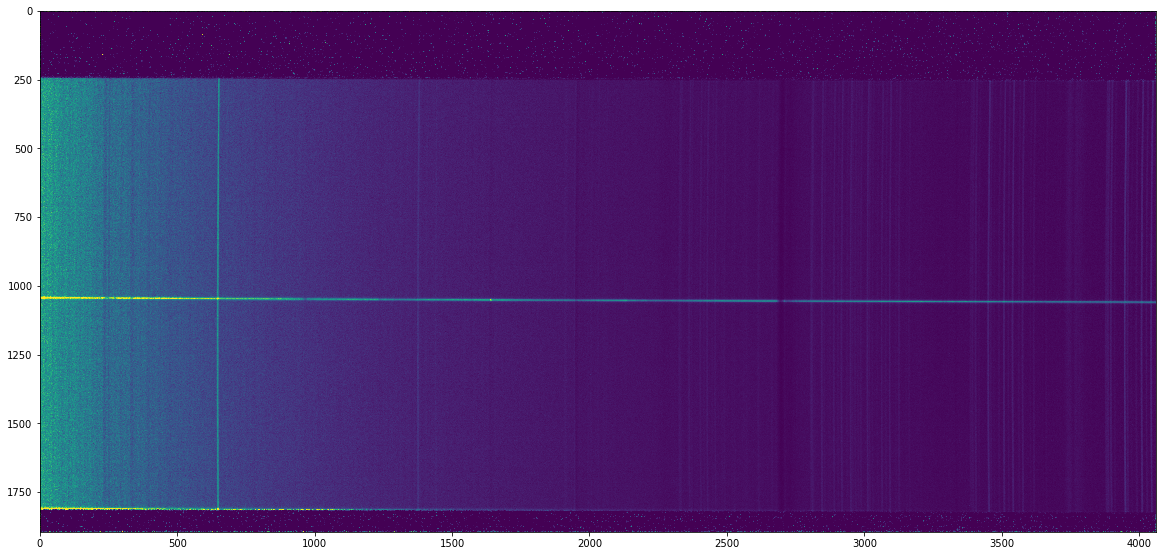

In [133]:
import os
from ccdproc import CCDData
import matplotlib.pyplot as plt

ccd = CCDData.read(os.path.join(params['reduced_data_path'], json_response['crejected']), unit='adu')


fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(ccd.data, cmap='viridis', clim=(0,500))
plt.show()

# Reduce - One Step

In [239]:
url = urllib.parse.urljoin(SERVER, '/api/image/reduce/')

params = {"raw_data_path": "/pipeline/data/raw/BRAZIL/20191011",
          "reduced_data_path":"/pipeline/data/reduced/BRAZIL/20191011",
          "file": "0223_OGLE-2019-BLG-1151-09-10-2019_comp.fits"}

json_response = make_request(url=url, method='POST', data=params)

# for lamp in ["0093_comp_400M2_GG455_HgArNe.fits"]:
#     params['file'] = lamp
#     json_response = make_request(url=url, method='POST', data=params)
#     print(json_response['reduced'])

{
    "reduced_data_path": "/pipeline/data/reduced/BRAZIL/20191011",
    "file": "0223_OGLE-2019-BLG-1151-09-10-2019_comp.fits",
    "raw_data_path": "/pipeline/data/raw/BRAZIL/20191011"
}
POST http://localhost:3000/api/image/reduce/
{
    "master_bias": "master_bias_RED_2x2_R03.89_G01.48.fits",
    "slit_trim_section": "[1:2005,83:902]",
    "master_flat": "master_flat_400_M2_GG455.fits",
    "pipeline_version": "1.3.0.dev6",
    "api_version": "0.1.0.dev1",
    "trim_section": "[26:2055,2:948]",
    "reduced": "cfzsto_0223_OGLE-2019-BLG-1151-09-10-2019_comp.fits",
    "overscan_region": "[3:24,1:948]"
}


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


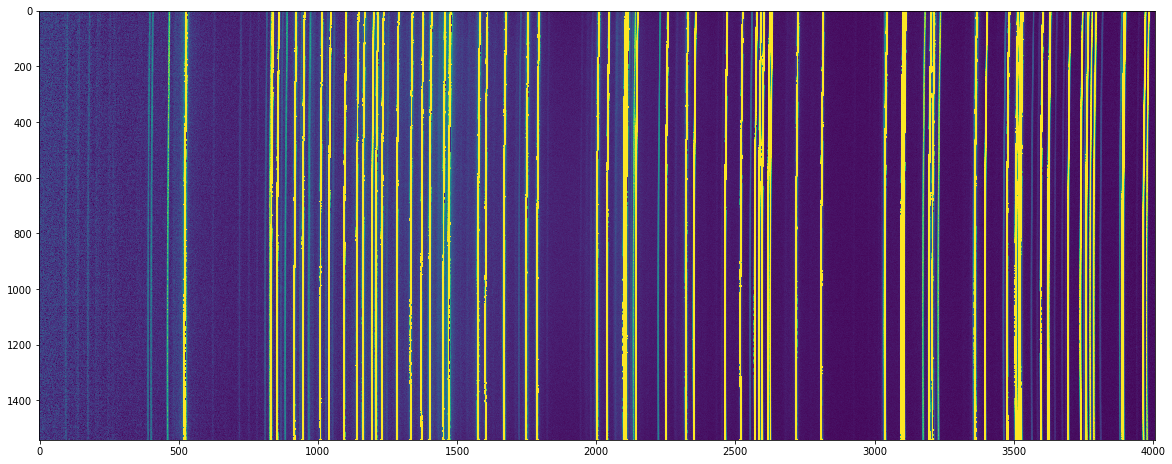

In [150]:
import os
from ccdproc import CCDData
import matplotlib.pyplot as plt

ccd = CCDData.read(os.path.join(params['reduced_data_path'], json_response['reduced']), unit='adu')


fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(ccd.data, cmap='viridis', clim=(0,500))
plt.show()

# Spectrum Reduce

Identify, trace, and extract

Needs a set of lamps for equal extraction.

In [165]:
url = urllib.parse.urljoin(SERVER, '/api/spectrum/reduce/')

params = {"data_path":"/pipeline/data/reduced/NOAO/20190912",
          "file": "cfzsto_0088_CVSO_2006.fits",
          "reference_lamp": "cfzsto_0093_comp_400M2_GG455_HgArNe.fits"}

json_response = make_request(url=url, method='POST', data=params)


{
    "data_path": "/pipeline/data/reduced/NOAO/20190912",
    "reference_lamp": "cfzsto_0093_comp_400M2_GG455_HgArNe.fits",
    "file": "cfzsto_0088_CVSO_2006.fits"
}
POST http://localhost:3000/api/spectrum/reduce/
{
    "target_1": {
        "target_center": 645.7796427041031,
        "trace_rms_error": 0.311573816961827,
        "reference_lamp": "ecfzsto_0093_comp_400M2_GG455_HgArNe_645.fits",
        "file_name": "ecfzsto_0088_CVSO_2006_645.fits"
    }
}


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


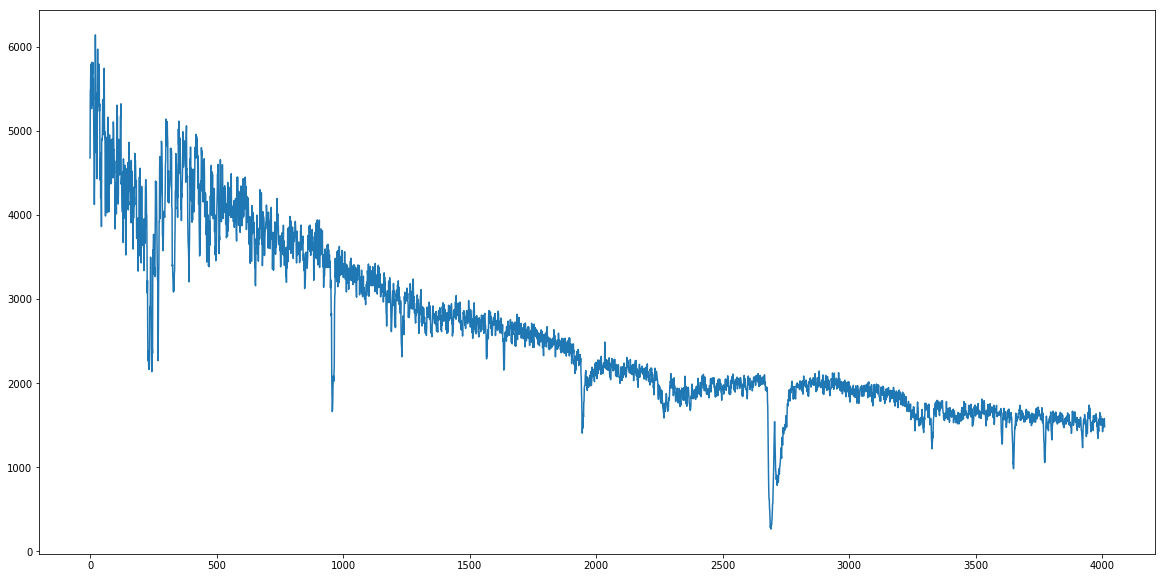

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


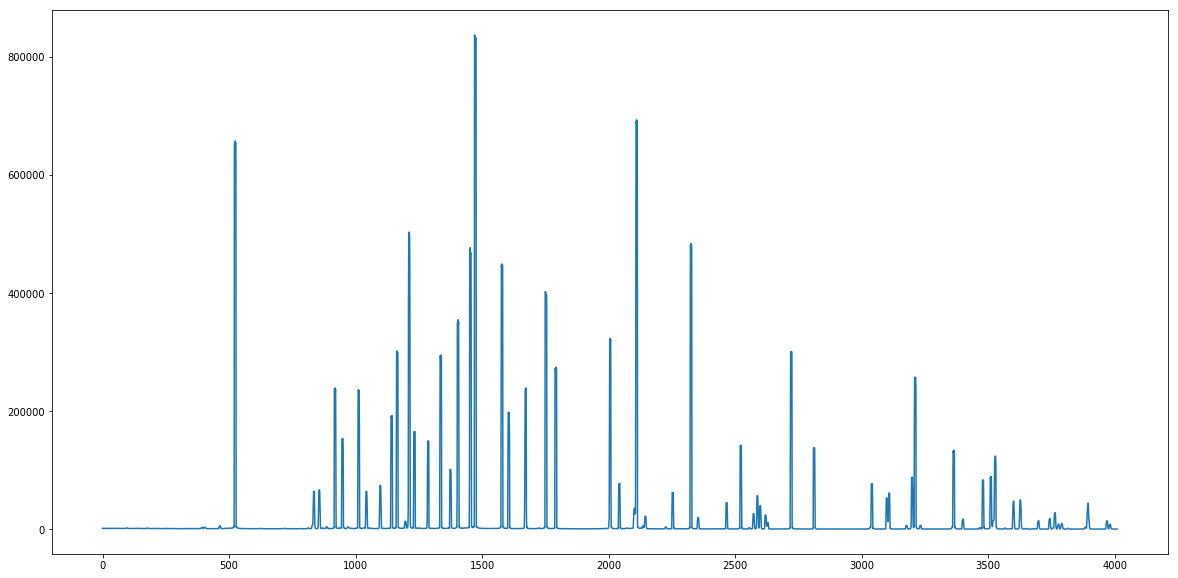

In [171]:
ccd = CCDData.read("/pipeline/data/reduced/NOAO/20190912/ecfzsto_0088_CVSO_2006_645.fits", unit='adu')

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(ccd.data)
plt.show()

lamp = CCDData.read("/pipeline/data/reduced/NOAO/20190912/ecfzsto_0093_comp_400M2_GG455_HgArNe_645.fits", unit='adu')

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(lamp.data)
plt.show()

# Spectrum Calibrate

Wavelength Calibration

In [195]:
url = urllib.parse.urljoin(SERVER, '/api/spectrum/calibrate/')

params = {"data_path":"/pipeline/data/reduced/NOAO/20190912",
          "file": "ecfzsto_0088_CVSO_2006_645.fits",
          "reference_lamp": "ecfzsto_0093_comp_400M2_GG455_HgArNe_645.fits",
          "correlation_tolerance": 30}

json_response = make_request(url=url, method='POST', data=params)

{
    "correlation_tolerance": 30,
    "data_path": "/pipeline/data/reduced/NOAO/20190912",
    "reference_lamp": "ecfzsto_0093_comp_400M2_GG455_HgArNe_645.fits",
    "file": "ecfzsto_0088_CVSO_2006_645.fits"
}
POST http://localhost:3000/api/spectrum/calibrate/
{
    "solution": {
        "wavelength_solution": [
            {
                "reference_lamp": "wecfzsto_0093_comp_400M2_GG455_HgArNe_645_ws_1.fits",
                "file_name": "wecfzsto_0088_CVSO_2006_645_ws_1.fits",
                "solution_info": {
                    "rms_error": "0.6681",
                    "nrjections": "7",
                    "npoints": "40"
                }
            }
        ]
    },
    "pipeline_version": "1.3.0.dev6",
    "api_version": "0.1.0.dev1"
}
